In [2]:
!pip install lime scikit-learn pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached lime-0.2.0.1-py3-none-any.whl
  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached scikit_image-0.25.2-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached tifffile-2025.6.1-py3-none-any.whl.metadata (32 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl (10.7 MB)
Using cached scikit_image-0.25.2-cp313-cp313-win_amd64.whl (12.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached tifffile-2025.6.1-py3-none-any.whl (230 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
!pip install --upgrade pip setuptools wheel




Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)


In [10]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
  Using cached shap-0.47.2.tar.gz (2.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl.metadata (5.0 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.61.2-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl (30.3 MB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Failed to build shap


  error: subprocess-exited-with-error
  
  × Building wheel for shap (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [260 lines of output]
      Attempting to build SHAP: with_binary=True, with_cuda=True (Attempt 1)
      The nvcc binary could not be located in your $PATH. Either add it to your path, or set $CUDAHOME to enable CUDA.
      Exception occurred during setup, Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
      Retrying SHAP build without cuda extension...
      Attempting to build SHAP: with_binary=True, with_cuda=False (Attempt 2)
      C:\Users\Usuario\AppData\Local\Temp\pip-build-env-163xk3h0\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expressio

In [10]:
# 📦 Imports
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 📂 1. Cargar dataset existente
import pandas as pd
df = pd.read_csv("dataset/clientes_credito.csv")


print(df.columns)


Index(['Edad', 'Ingresos', 'Historial Crediticio', 'Deuda Total',
       'Historial de Pagos', 'Target'],
      dtype='object')


In [14]:
# 🧠 2. Entrenamiento del modelo
# Codificación One-Hot de columnas categóricas
X = pd.get_dummies(df.drop('Target', axis=1), columns=['Historial Crediticio', 'Historial de Pagos'])

# Target
y = df['Target']

# División en entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.99


<Figure size 640x480 with 0 Axes>

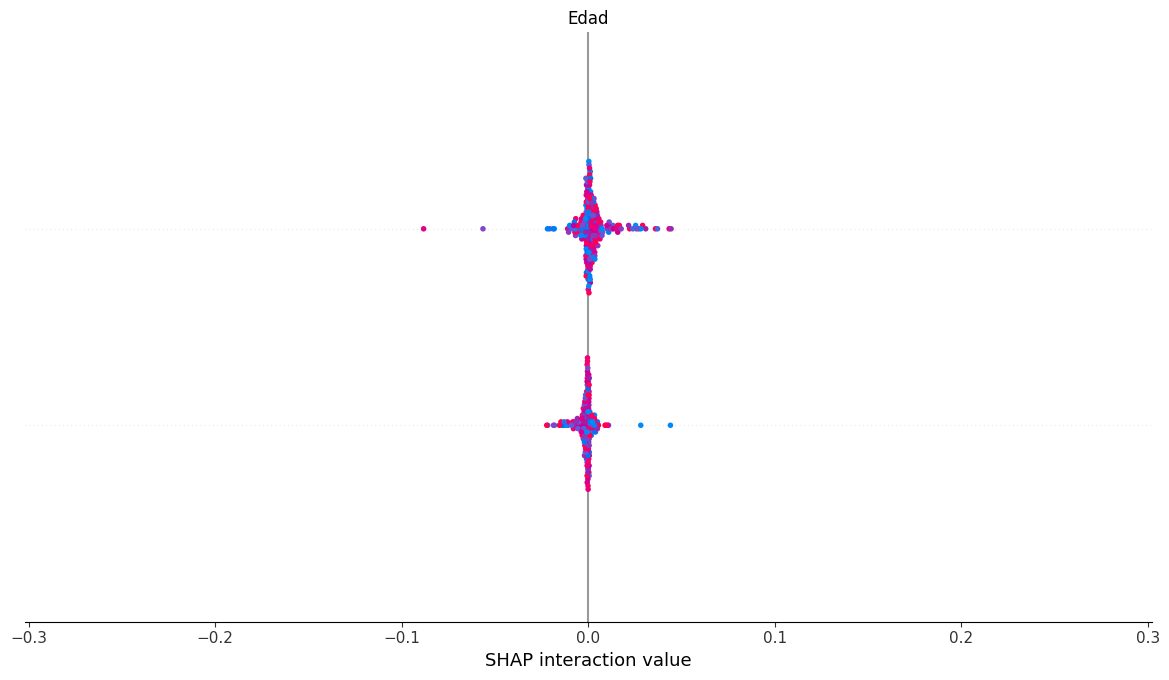

In [17]:
# 🎯 3. Evaluación del modelo
# Codificación One-Hot
X = pd.get_dummies(df.drop('Target', axis=1), columns=['Historial Crediticio', 'Historial de Pagos'])

# Asegurarse que todos los datos son numéricos (float o int)
X = X.astype(float)

y = df['Target']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# SHAP
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Mostrar resumen
shap.summary_plot(shap_values, X_test)



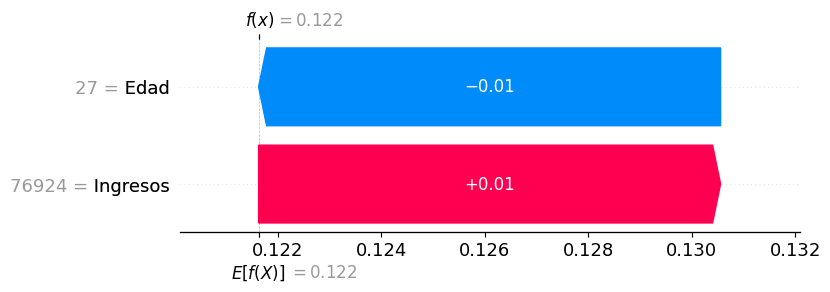

In [18]:
# 🔍 5. Interpretación Local con SHAP
shap.initjs()

# Crear el explainer basado en árboles
explainer = shap.TreeExplainer(model)

# Obtener los valores SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test)

# Seleccionar una muestra del conjunto de prueba
sample = X_test.iloc[0:1]

# Construir una explicación manualmente para la clase 1 (buen candidato)
explanation = shap.Explanation(
    values=shap_values[1][0],  # Valores SHAP para la clase positiva
    base_values=explainer.expected_value[1],  # Valor base (esperado)
    data=sample.values[0],  # Valores reales de la muestra
    feature_names=sample.columns.tolist()  # Nombres de las características
)

# Visualización local tipo "waterfall" (recomendado para SHAP moderno)
shap.plots.waterfall(explanation)





c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


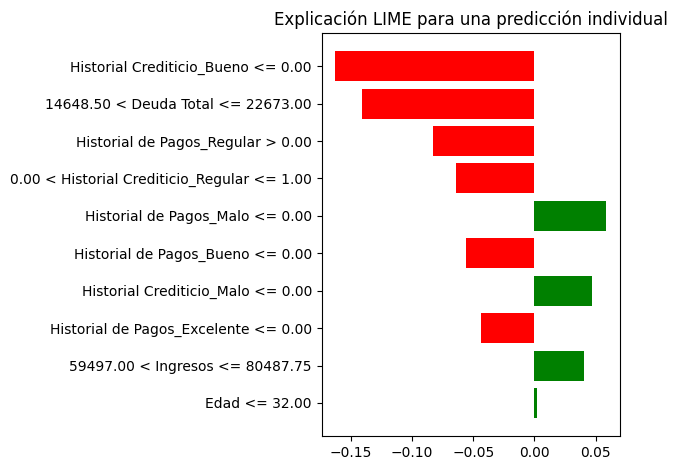

In [19]:
# 💡 6. Interpretación Local con LIME
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["Mal Candidato", "Buen Candidato"],
    mode="classification"
)

# Seleccionar una instancia de prueba
test_instance = X_test.iloc[0]

# Generar explicación
lime_exp = lime_explainer.explain_instance(
    test_instance.values,        # valores como array
    model.predict_proba,         # función predict_proba del modelo
    num_features=len(X_train.columns)
)

# Mostrar explicación de forma alternativa (sin .show_in_notebook)
fig = lime_exp.as_pyplot_figure()
plt.title("Explicación LIME para una predicción individual")
plt.tight_layout()
plt.show()


In [20]:
# LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=['Rechazado', 'Aprobado'],
    mode='classification'
)

# Elegimos un ejemplo positivo y uno negativo
idx_pos = y_test[y_test == 1].index[0]
idx_neg = y_test[y_test == 0].index[0]

# Explicaciones
exp_pos = lime_explainer.explain_instance(
    data_row=X_test.loc[idx_pos].values,
    predict_fn=model.predict_proba,
    num_features=6
)

exp_neg = lime_explainer.explain_instance(
    data_row=X_test.loc[idx_neg].values,
    predict_fn=model.predict_proba,
    num_features=6
)

# Guardar explicaciones en HTML
exp_pos.save_to_file('lime_explicacion_aprobado.html')
exp_neg.save_to_file('lime_explicacion_rechazado.html')


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
